In [1]:
# Import relevant items
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,8]

In [2]:

import seaborn as sns

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,8]

In [27]:
foo = r'C:\Users\ACER\Desktop\python project\airqo/Bugolobi.csv'

The code below uses the pd.DatetimeIndex() function to create time features like year, day of the year, quarter, month, day, weekdays, etc.

In [28]:
df= pd.read_csv(foo, parse_dates=True)
#swaps day & month
df.TimeStamp = pd.to_datetime(df.TimeStamp, dayfirst=True)
#df = df.set_index('TimeStamp')


In [29]:
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pm2_5      8057 non-null   float64       
 1   pm10       8057 non-null   float64       
 2   s2_pm2_5   8057 non-null   float64       
 3   s2_pm10    8057 non-null   float64       
 4   TimeStamp  8057 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 314.9 KB
None


,pm2_5,pm10,s2_pm2_5,s2_pm10,TimeStamp
0,19.80,19.90,20.77,21.88,2019-03-12 09:57:00
1,21.70,22.47,19.18,20.33,2019-03-12 09:58:00
2,13.42,14.03,14.18,15.15,2019-03-12 11:14:00
3,12.72,13.97,14.83,15.52,2019-03-12 11:15:00
4,13.93,13.97,17.40,17.87,2019-03-12 11:17:00


In [31]:
# findng the average of both sensors
df['mean_pm2_5'] = df.iloc[:,[0,2]].mean(axis=1)
df['mean_pm10'] = df.iloc[:,[1,3]].mean(axis=1)
print(df.head(5))
df.shape

   pm2_5   pm10  s2_pm2_5  s2_pm10           TimeStamp  mean_pm2_5  mean_pm10
0  19.80  19.90     20.77    21.88 2019-03-12 09:57:00      20.285     20.890
1  21.70  22.47     19.18    20.33 2019-03-12 09:58:00      20.440     21.400
2  13.42  14.03     14.18    15.15 2019-03-12 11:14:00      13.800     14.590
3  12.72  13.97     14.83    15.52 2019-03-12 11:15:00      13.775     14.745
4  13.93  13.97     17.40    17.87 2019-03-12 11:17:00      15.665     15.920


(8057, 7)

In [32]:
import datetime
# Rename 
df = df.rename(columns={"TimeStamp": "Date"})


In [33]:
import datetime as dt

df['month'] = df['Date'].dt.month_name()
df['months'] = pd.DatetimeIndex(df['Date']).month
df['Hour'] = pd.DatetimeIndex(df['Date']).hour
df['Dates'] = df['Date'].dt.strftime('%Y-%m-%d')



In [35]:
df.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,Date,mean_pm2_5,mean_pm10,month,months,Hour,Dates
0,19.80,19.90,20.77,21.88,2019-03-12 09:57:00,20.285,20.890,March,3,9,2019-03-12
1,21.70,22.47,19.18,20.33,2019-03-12 09:58:00,20.440,21.400,March,3,9,2019-03-12
2,13.42,14.03,14.18,15.15,2019-03-12 11:14:00,13.800,14.590,March,3,11,2019-03-12
3,12.72,13.97,14.83,15.52,2019-03-12 11:15:00,13.775,14.745,March,3,11,2019-03-12
4,13.93,13.97,17.40,17.87,2019-03-12 11:17:00,15.665,15.920,March,3,11,2019-03-12


In [36]:
df = df.drop(df[df.s2_pm2_5  > 1001].index)
df = df.drop(df[df.s2_pm2_5  <= 0.62].index)
df.s2_pm2_5 = np.where(df.s2_pm2_5 >500, 500,df.s2_pm2_5)

In [37]:
df.pm2_5

0       19.80
1       21.70
2       13.42
3       12.72
4       13.93
        ...  
8052    34.58
8053    37.18
8054    36.53
8055    34.10
8056    36.43
Name: pm2_5, Length: 8057, dtype: float64

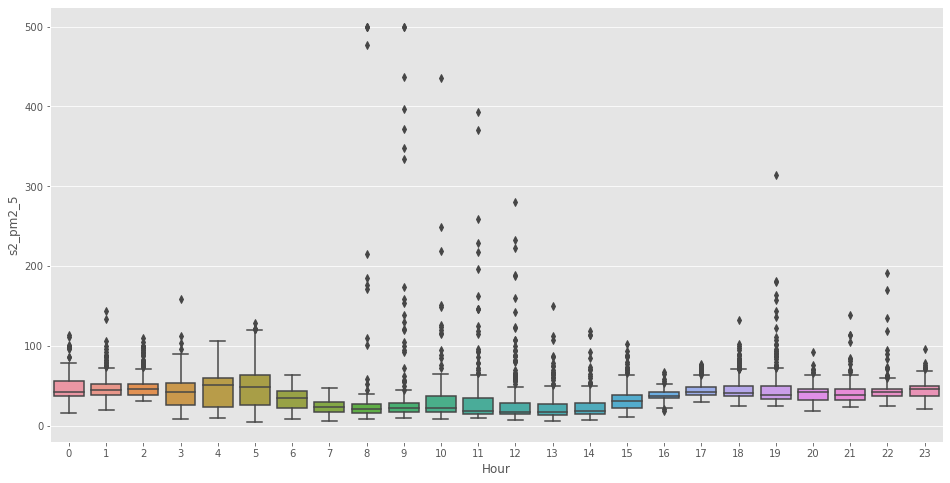

In [38]:
ax = sns.boxplot(x="Hour", y="s2_pm2_5", data=df)

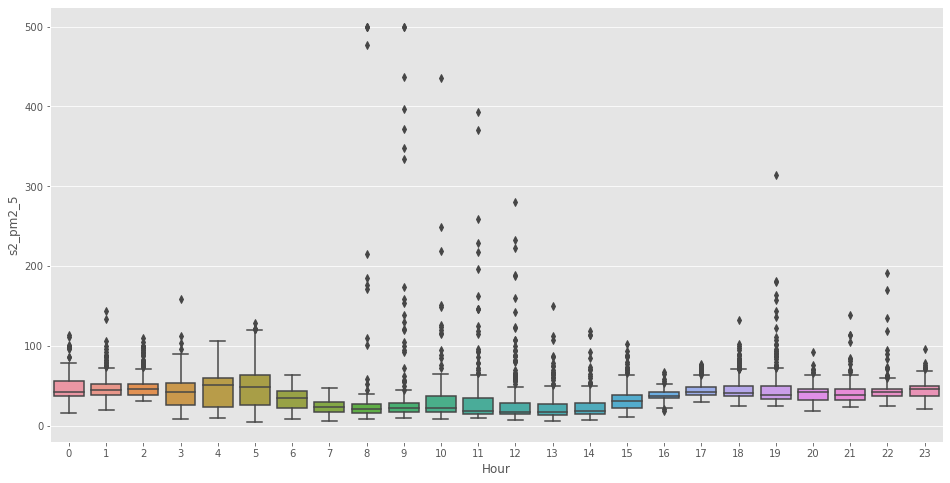

In [41]:
ax = sns.boxplot(x="Hour", y="s2_pm2_5", data=df)

In [13]:
#df = df.drop(df[df.mean_pm2_5 > 500.1].index)

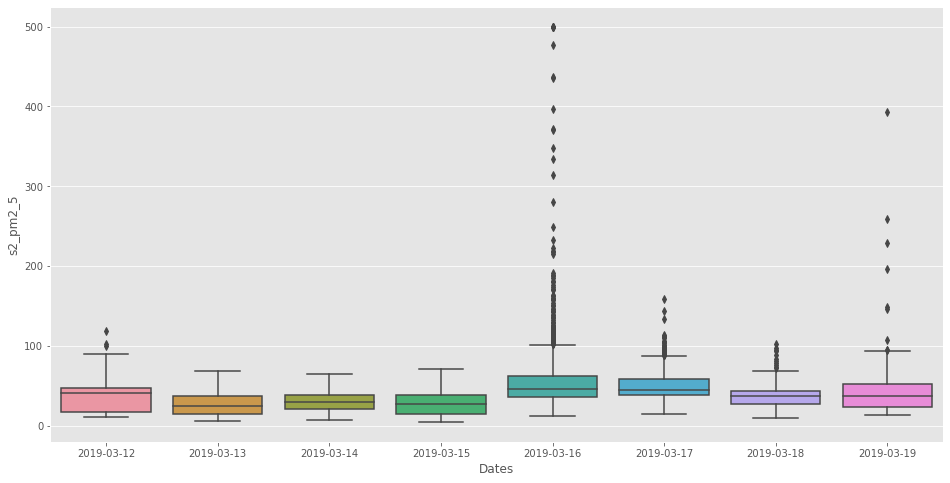

In [42]:
ax = sns.boxplot(x="Dates", y="s2_pm2_5", data=df)

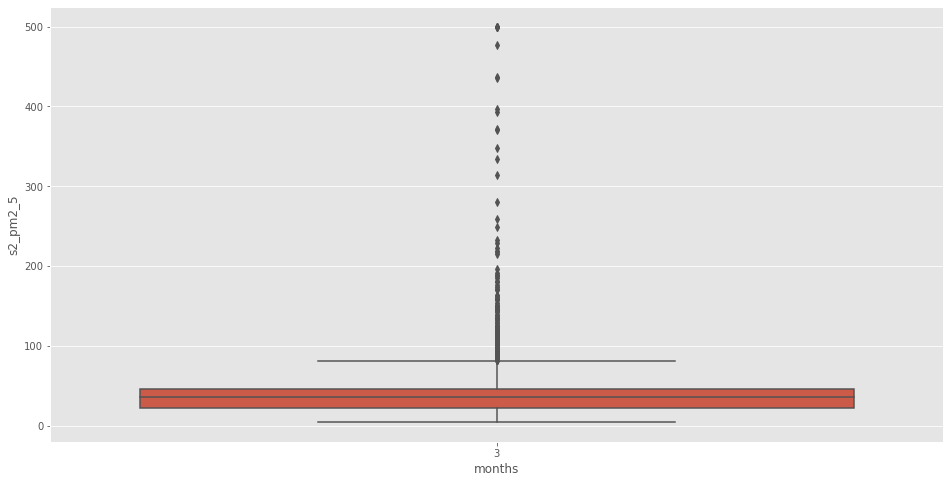

In [43]:
ax = sns.boxplot(x="months", y="s2_pm2_5", data=df)

In [75]:
# DROPPING pm2_5   pm10  s2_pm2_5  s2_pm10
#df = df.drop(['pm2_5',   'pm10',  's2_pm2_5',  's2_pm10','Date'], axis=1)
print(df.head(5))
df.shape

   mean_pm2_5  mean_pm10  month  months  Hour       Dates
0      20.285     20.890  March       3     9  2019-03-12
1      20.440     21.400  March       3     9  2019-03-12
2      13.800     14.590  March       3    11  2019-03-12
3      13.775     14.745  March       3    11  2019-03-12
4      15.665     15.920  March       3    11  2019-03-12


(8052, 6)

In [43]:
#df = df.drop(['Date'], axis=1)

In [44]:
df.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,Date,mean_pm2_5,mean_pm10,month,months,Hour,Dates
0,19.80,19.90,20.77,21.88,2019-03-12 09:57:00,20.285,20.890,March,3,9,2019-03-12
1,21.70,22.47,19.18,20.33,2019-03-12 09:58:00,20.440,21.400,March,3,9,2019-03-12
2,13.42,14.03,14.18,15.15,2019-03-12 11:14:00,13.800,14.590,March,3,11,2019-03-12
3,12.72,13.97,14.83,15.52,2019-03-12 11:15:00,13.775,14.745,March,3,11,2019-03-12
4,13.93,13.97,17.40,17.87,2019-03-12 11:17:00,15.665,15.920,March,3,11,2019-03-12


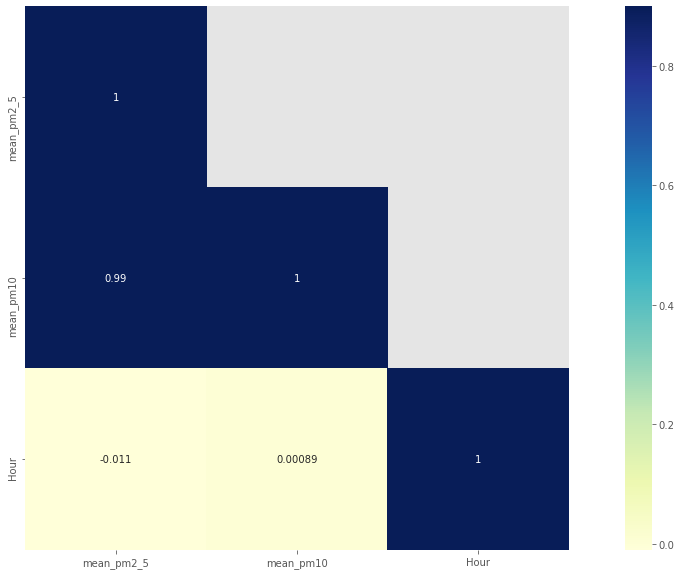

In [78]:
# looking at the correlation between numerical variables
corr = df[["mean_pm2_5", "mean_pm10","Hour"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [16]:
# looking for missing values in the datasaet
df.isnull().sum()

pm2_5         0
pm10          0
s2_pm2_5      0
s2_pm10       0
Date          0
mean_pm2_5    0
mean_pm10     0
month         0
months        0
Hour          0
Dates         0
dtype: int64

In [17]:
df.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,Date,mean_pm2_5,mean_pm10,month,months,Hour,Dates
0,19.80,19.90,20.77,21.88,2019-03-12 09:57:00,20.285,20.890,March,3,9,2019-03-12
1,21.70,22.47,19.18,20.33,2019-03-12 09:58:00,20.440,21.400,March,3,9,2019-03-12
2,13.42,14.03,14.18,15.15,2019-03-12 11:14:00,13.800,14.590,March,3,11,2019-03-12
3,12.72,13.97,14.83,15.52,2019-03-12 11:15:00,13.775,14.745,March,3,11,2019-03-12
4,13.93,13.97,17.40,17.87,2019-03-12 11:17:00,15.665,15.920,March,3,11,2019-03-12


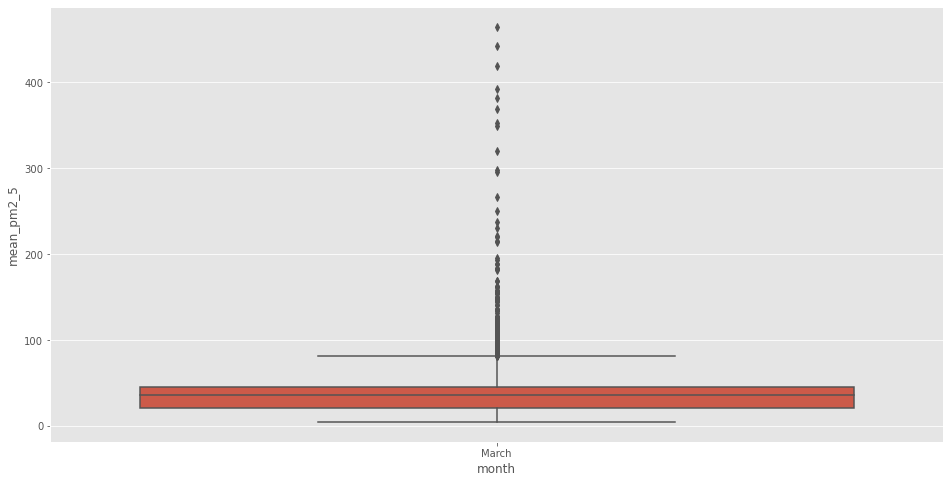

In [80]:
ax = sns.boxplot(x="month", y="mean_pm2_5", data=df)

In [17]:
daily = df.set_index('Date').groupby(pd.Grouper(freq='H'))['s2_pm2_5'].mean()
monthly = daily.groupby(pd.Grouper(freq='H')).mean()
#Dropping all Nan values
monthlys = monthly.dropna(axis=0)
print (monthlys.head())
print (monthlys.shape)

Date
2019-03-12 09:00:00    19.975000
2019-03-12 11:00:00    15.408571
2019-03-12 12:00:00    14.654348
2019-03-12 13:00:00    14.365435
2019-03-12 14:00:00    15.451739
Name: s2_pm2_5, dtype: float64
(179,)


In [26]:
df1 =df[['Date','s2_pm2_5']]

In [50]:
# saving the houry average data fro PM2.5
df.to_csv(r'C:\Users\ACER\Desktop\python project\airqo/BugolobiHOULYNUMPY.csv',index = True)

In [49]:
df.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,Date,mean_pm2_5,mean_pm10,month,months,Hour,Dates
0,19.80,19.90,20.77,21.88,2019-03-12 09:57:00,20.285,20.890,March,3,9,2019-03-12
1,21.70,22.47,19.18,20.33,2019-03-12 09:58:00,20.440,21.400,March,3,9,2019-03-12
2,13.42,14.03,14.18,15.15,2019-03-12 11:14:00,13.800,14.590,March,3,11,2019-03-12
3,12.72,13.97,14.83,15.52,2019-03-12 11:15:00,13.775,14.745,March,3,11,2019-03-12
4,13.93,13.97,17.40,17.87,2019-03-12 11:17:00,15.665,15.920,March,3,11,2019-03-12
